In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
data= pd.read_csv('Documents/ANZ synthesised transaction dataset pro.csv')
#data= reduce_mem_usage(data)
#print(data.shape)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 16 columns):
status               12043 non-null object
account              12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
first_name           12043 non-null object
balance              12043 non-null float64
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
customer_id          12043 non-null object
merchant_long_lat    7717 non-null object
movement             12043 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 1.5+ MB


In [6]:
data.head()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,1956.58,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.57,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
1,authorized,ACC-2528867619,138.58 -34.96,SALES-POS,ea247b5c-61ee-4106-988f-84c3036ce5e0,Abigail,1913.92,40,South Nowra,NSW,2018-08-08T04:38:14.000+0000,42.66,a916b60869c94bc69e95e212d4581718,CUS-2505971401,150.6 -34.92,debit
2,authorized,ACC-2528867619,138.58 -34.96,SALES-POS,8927cdaf-73bc-49c2-ad75-0ebfbe983053,Abigail,1895.24,40,Yass,NSW,2018-08-08T08:49:24.000+0000,18.68,34ccea941f844b94be7aa894a14e6e8c,CUS-2505971401,148.91 -34.84,debit
3,authorized,ACC-2528867619,138.58 -34.96,POS,d47efc0a-2443-47d0-ad6b-4379779d2e3e,Abigail,1850.22,40,Albany,WA,2018-08-08T17:29:40.000+0000,45.02,62439234cc7748d787db7678cd886c70,CUS-2505971401,117.89 -35.03,debit
4,authorized,ACC-2528867619,138.58 -34.96,POS,21960650-c56e-4411-bc06-56e9964daf8e,Abigail,1830.26,40,Allenby Gardens,SA,2018-08-08T21:40:26.000+0000,19.96,a6b80b62044441dca4ad8c94a108cfe6,CUS-2505971401,138.56 -34.89,debit


In [7]:
data.tail()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
12038,posted,ACC-3689607373,115.79 -31.79,INTER BANK,NaN,Virginia,8983.86,20,NaN,NaN,2018-10-26T19:00:00.000+0000,55.00,b858b953f9af4e52b88949172868ec44,CUS-127297539,NaN,debit
12039,posted,ACC-3689607373,115.79 -31.79,PAYMENT,NaN,Virginia,8914.86,20,NaN,NaN,2018-10-26T21:00:00.000+0000,69.00,98a1fb9cb9b14d60a5da52a44496ece7,CUS-127297539,NaN,debit
12040,authorized,ACC-3689607373,115.79 -31.79,POS,feff3519-afd1-4bf9-84f8-7add57b84d0d,Virginia,8889.23,20,Perth,WA,2018-10-27T08:25:28.000+0000,25.63,42246360f65e4b719455f5b0e21366aa,CUS-127297539,115.86 -31.95,debit
12041,authorized,ACC-3689607373,115.79 -31.79,POS,948749e3-471e-4a8f-92ad-73e934b95ec4,Virginia,8872.02,20,Sydney,NSW,2018-10-28T11:30:40.000+0000,17.21,c0f7b8f746df43ebb91406b9f508be0a,CUS-127297539,151.21 -33.87,debit
12042,authorized,ACC-3689607373,115.79 -31.79,POS,3e2442b6-9e5c-4c09-9782-a7139d4bfe49,Virginia,8857.23,20,Belmont,WA,2018-10-29T13:08:38.000+0000,14.79,002ceb9e43e1409d9a800f61f179c808,CUS-127297539,115.93 -31.96,debit


In [8]:
for i in ['account','customer_id','first_name']:
    print(f'unique [{i}] count:', data[i].nunique())

unique [account] count: 100
unique [customer_id] count: 100
unique [first_name] count: 80


In [9]:
total_transaction= data['amount'].sum()
print(total_transaction)

2263284.2


In [10]:
data.groupby('transaction_id') ['movement'].first().value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [11]:
data.groupby('transaction_id')['first_name'].first().value_counts().head()

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

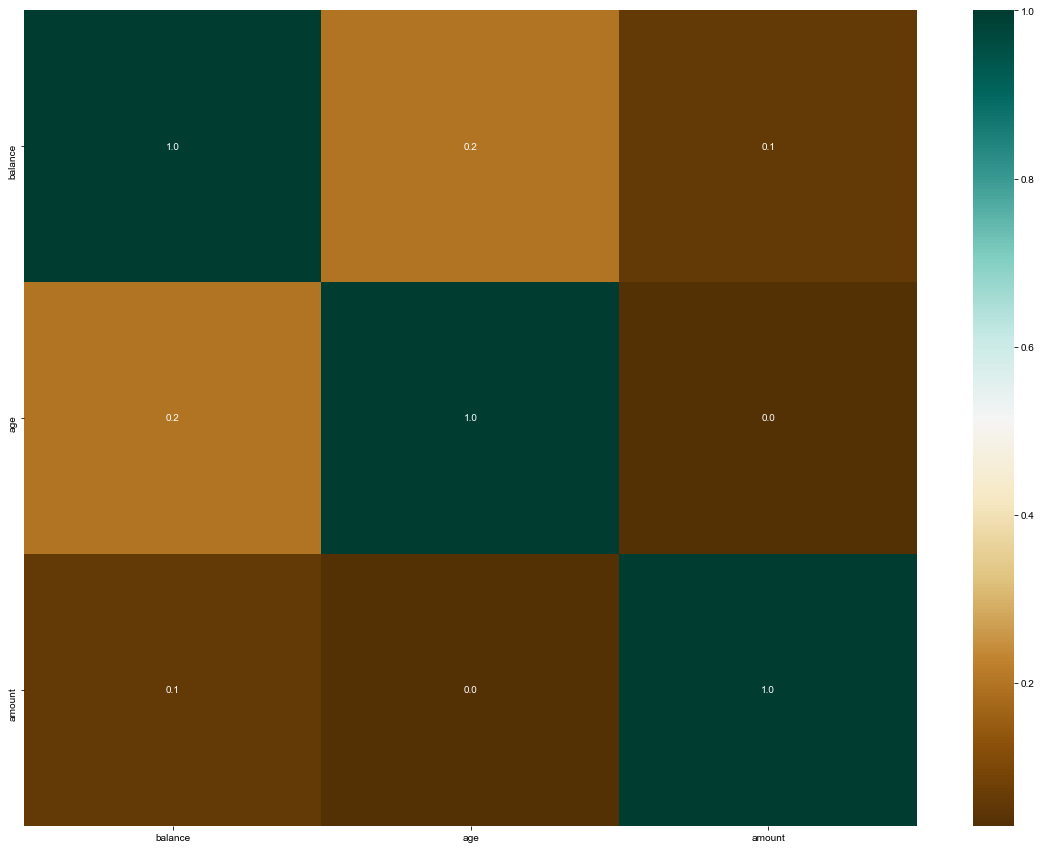

In [12]:
corr = data.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [13]:
data.set_index("txn_description").head(10)


,status,account,long_lat,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
txn_description,,,,,,,,,,,,,,,
PAY/SALARY,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1956.58,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.57,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
SALES-POS,authorized,ACC-2528867619,138.58 -34.96,ea247b5c-61ee-4106-988f-84c3036ce5e0,Abigail,1913.92,40,South Nowra,NSW,2018-08-08T04:38:14.000+0000,42.66,a916b60869c94bc69e95e212d4581718,CUS-2505971401,150.6 -34.92,debit
SALES-POS,authorized,ACC-2528867619,138.58 -34.96,8927cdaf-73bc-49c2-ad75-0ebfbe983053,Abigail,1895.24,40,Yass,NSW,2018-08-08T08:49:24.000+0000,18.68,34ccea941f844b94be7aa894a14e6e8c,CUS-2505971401,148.91 -34.84,debit
POS,authorized,ACC-2528867619,138.58 -34.96,d47efc0a-2443-47d0-ad6b-4379779d2e3e,Abigail,1850.22,40,Albany,WA,2018-08-08T17:29:40.000+0000,45.02,62439234cc7748d787db7678cd886c70,CUS-2505971401,117.89 -35.03,debit
POS,authorized,ACC-2528867619,138.58 -34.96,21960650-c56e-4411-bc06-56e9964daf8e,Abigail,1830.26,40,Allenby Gardens,SA,2018-08-08T21:40:26.000+0000,19.96,a6b80b62044441dca4ad8c94a108cfe6,CUS-2505971401,138.56 -34.89,debit
INTER BANK,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1754.26,40,NaN,NaN,2018-08-09T03:00:00.000+0000,76.00,947184c7f3eb47c8895a6b78c4e68358,CUS-2505971401,NaN,debit
POS,authorized,ACC-2528867619,138.58 -34.96,b327cceb-f5ec-40d2-be18-d7315f2b8f54,Abigail,1735.38,40,Salisbury,SA,2018-08-09T15:31:35.000+0000,18.88,7d53d44b6b5045efb24dc2eb3584f554,CUS-2505971401,138.64 -34.76,debit
POS,authorized,ACC-2528867619,138.58 -34.96,2a1bebdc-3f02-4cce-a261-81a8010a93fc,Abigail,1699.68,40,Modbury,SA,2018-08-09T17:30:46.000+0000,35.70,2966394a3e684adf95f9d205077200d5,CUS-2505971401,138.69 -34.83,debit
PAYMENT,posted,ACC-2528867619,138.58 -34.96,NaN,Abigail,1619.68,40,NaN,NaN,2018-08-10T10:00:00.000+0000,80.00,32227bc9ed8e4f9ab8f0e4244976dd31,CUS-2505971401,NaN,debit


In [14]:
data_salary=data[data["txn_description"].isin(["PAY/SALARY"])]
data_salary

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,1956.58,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.57,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
9,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,3566.25,40,NaN,NaN,2018-08-10T13:00:00.000+0000,1946.57,8c0c8e7aeabd4865ba874093306dbac4,CUS-2505971401,NaN,credit
20,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,5075.31,40,NaN,NaN,2018-08-17T13:00:00.000+0000,1946.57,26795b712fa142b58a636d823b5e0191,CUS-2505971401,NaN,credit
25,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,6711.74,40,NaN,NaN,2018-08-24T13:00:00.000+0000,1946.57,fb732c8fc3904949a1d7a5103195cd52,CUS-2505971401,NaN,credit
28,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,8532.43,40,NaN,NaN,2018-08-31T13:00:00.000+0000,1946.57,8e1bad39009c4356aef19c44de6bae7b,CUS-2505971401,NaN,credit
34,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,10201.90,40,NaN,NaN,2018-09-07T13:00:00.000+0000,1946.57,9e143db5f523403cb161b094a32b8a13,CUS-2505971401,NaN,credit
45,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,11526.36,40,NaN,NaN,2018-09-14T13:00:00.000+0000,1946.57,4991c80eb8e94be881eb27a9c3428f7f,CUS-2505971401,NaN,credit
55,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,13179.17,40,NaN,NaN,2018-09-21T13:00:00.000+0000,1946.57,fb10516e88af4a2d905b7f3b4775fc8e,CUS-2505971401,NaN,credit
61,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,14874.05,40,NaN,NaN,2018-09-28T13:00:00.000+0000,1946.57,b3698c4da8dc48d1ac85e91e2eec3504,CUS-2505971401,NaN,credit
65,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,16629.46,40,NaN,NaN,2018-10-05T13:00:00.000+0000,1946.57,ec9bc910d4c5430cbdd75d9f8095e836,CUS-2505971401,NaN,credit


In [20]:
monthly_income=(data_salary.groupby('first_name')['amount'].sum()/3).sort_values(ascending=False)

In [35]:
print(monthly_income)

first_name
Michael        35469.810000
Kenneth        21306.326667
Jessica        14490.840000
Linda          14299.933333
Ryan           12467.823333
Susan          12311.483333
Richard        12120.786667
Tim            11781.306667
Ricky          11214.710000
Kimberly       10736.333333
Tyler          10642.573333
Christopher    10054.360000
Joseph          9979.073333
Natasha         9837.426667
Charles         9641.870000
Michelle        9280.740000
Isaiah          9109.216667
Billy           8833.486667
Eric            8690.593333
Christine       8505.850000
Abigail         8435.136667
Lucas           8350.183333
Sandra          8207.756667
Craig           8109.540000
Daniel          7767.130000
Marissa         7590.240000
Brian           7539.606667
Robert          7508.560000
Robin           7416.023333
Cindy           7353.880000
                   ...     
Derek           4765.366667
Diana           4730.460000
Rachael         4721.920000
Kaitlyn         4493.970000
Patrick  

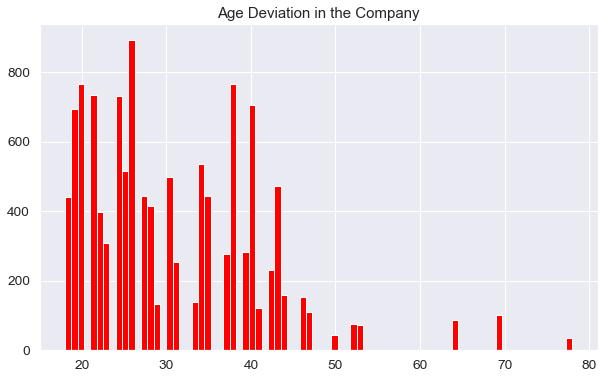

In [126]:
plt.figure(figsize=(10,6))
plt.title("Age Deviation in the Company")
std_age=plt.hist(data['age'], bins=80, color="red")

In [23]:
age_all=data.groupby('first_name')['age'].first()

In [74]:
print(age_all) 

first_name
Abigail        40
Alexander      38
Amy            43
Andrew         78
Antonio        26
Ashley         25
Barry          38
Billy          52
Brian          42
Catherine      26
Charles        18
Christine      39
Christopher    33
Cindy          19
Craig          28
Daniel         22
Darren         20
David          42
Debra          18
Derek          20
Diana          26
Donald         22
Dustin         28
Edward         19
Elizabeth      50
Emily          43
Eric           22
Fernando       19
Gregory        42
Heather        41
               ..
Matthew        39
Melissa        30
Michael        38
Michele        30
Michelle       19
Natasha        40
Nathaniel      31
Patrick        46
Paul           25
Rachael        21
Renee          38
Rhonda         40
Richard        24
Ricky          43
Robert         20
Robin          34
Ronald         25
Ruth           47
Ryan           31
Sandra         34
Sarah          46
Scott          23
Stephanie      53
Susan          20

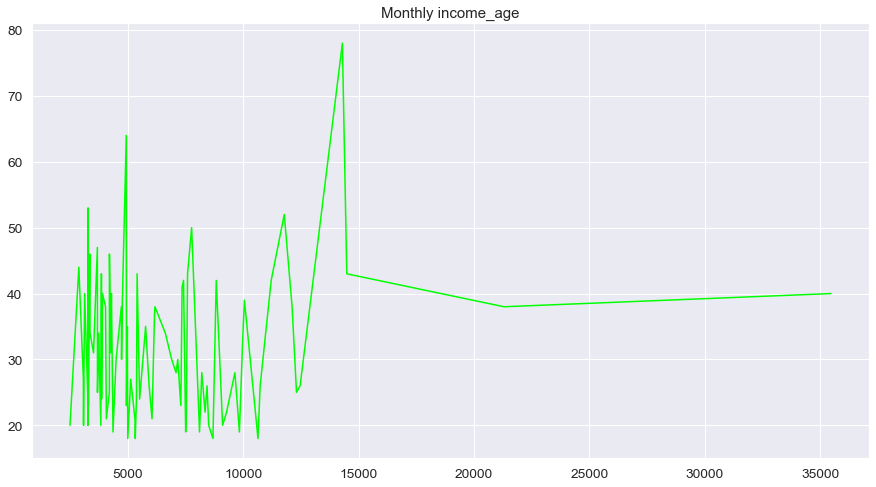

In [108]:
x=monthly_income
y=age_all
plt.figure(figsize=(15,8))
plt.title("Monthly income_age")
plt.plot(x,y,color="lime")

In [76]:
Annual_salary=monthly_income*12

In [77]:
print(Annual_salary)

first_name
Michael        425637.72
Kenneth        255675.92
Jessica        173890.08
Linda          171599.20
Ryan           149613.88
Susan          147737.80
Richard        145449.44
Tim            141375.68
Ricky          134576.52
Kimberly       128836.00
Tyler          127710.88
Christopher    120652.32
Joseph         119748.88
Natasha        118049.12
Charles        115702.44
Michelle       111368.88
Isaiah         109310.60
Billy          106001.84
Eric           104287.12
Christine      102070.20
Abigail        101221.64
Lucas          100202.20
Sandra          98493.08
Craig           97314.48
Daniel          93205.56
Marissa         91082.88
Brian           90475.28
Robert          90102.72
Robin           88992.28
Cindy           88246.56
                 ...    
Derek           57184.40
Diana           56765.52
Rachael         56663.04
Kaitlyn         53927.64
Patrick         52319.04
Edward          51508.60
Scott           51100.92
Stephanie       50464.44
Heather       

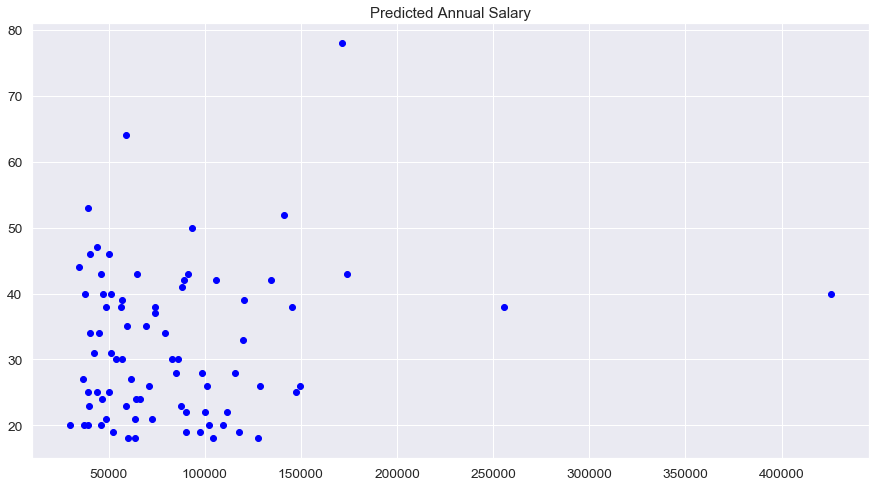

In [119]:
x=Annual_salary
y=age_all
plt.figure(figsize=(15,8))
plt.title("Predicted Annual Salary")
plt.scatter(x,y,color="blue")

In [128]:
print('Here we have cleaned the dataset, explored it through simple Exploratory Data Analysis and have done some Feature Engineering to conclude with the expected Annual Salary of the customers. I have successfully anlysed the monthly incomes and caculated the predicted annual income. I have also found out the corelation between age and salary of the customers, the maximum salary a person gets and the transaction details. Came to a conclusion, that there is no such correlation between age and salary of a customer. Finally every visualisations are plotted and explained for further analysis.Thank you very much.')

Here we have cleaned the dataset, explored it through simple Exploratory Data Analysis and have done some Feature Engineering to conclude with the expected Annual Salary of the customers. I have successfully anlysed the monthly incomes and caculated the predicted annual income. I have also found out the corelation between age and salary of the customers, the maximum salary a person gets and the transaction details. Came to a conclusion, that there is no such correlation between age and salary of a customer. Finally every visualisations are plotted and explained for further analysis.Thank you very much.


In [37]:
from sklearn.model_selection import train_test_split

In [87]:
x=data_salary['age']
y=data_salary['amount']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr=LinearRegression()

In [91]:
y_train

7445      596.33
402      1098.91
4425     3903.73
5227      920.71
5243     2544.76
7192     1560.20
6640     1626.48
10471    2470.45
3302     1681.58
5062     1037.07
8571     1541.12
7822     1158.15
6395     1396.23
5860     1068.04
276      1630.36
11287    1640.83
6416     1396.23
9219      916.75
1357     2308.67
6354     1396.23
9675     1711.39
8121     4216.04
1997     1099.70
3062      664.43
1748     3328.77
7558     1002.13
7918     3977.46
2690     1928.97
2884      990.55
11567    2840.15
          ...   
8222     2886.52
9132      916.75
5215      920.71
5788     1059.84
476      2282.36
8851      892.09
3059      664.43
8245     2886.52
2982     1436.98
6938     1636.72
7427     1002.13
2868      990.55
7242     1560.20
5575      725.32
3043      664.43
6674     1626.48
3183     2639.76
118      3649.51
6540      862.95
7716     2280.36
8408     2687.85
5590     1059.84
8461     2023.68
7663     2280.36
2961      990.55
3447     2101.51
7761     1158.15
9934     1272.

In [92]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
data_salary.tail(50)

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
11203,posted,ACC-1523339231,115.83 -31.90,PAY/SALARY,NaN,Tim,62647.22,40,NaN,NaN,2018-08-20T13:00:00.000+0000,8835.98,b608ce5142664a79af4fa071a886c8f7,CUS-1816693151,NaN,credit
11224,posted,ACC-1523339231,115.83 -31.90,PAY/SALARY,NaN,Tim,70242.78,40,NaN,NaN,2018-09-20T13:00:00.000+0000,8835.98,854ded55d0034ac8b9e91e16334768ca,CUS-1816693151,NaN,credit
11253,posted,ACC-1523339231,115.83 -31.90,PAY/SALARY,NaN,Tim,77054.31,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,873a3f11d03d41a99c55a5b1a3850e1a,CUS-1816693151,NaN,credit
11254,posted,ACC-1523339231,115.83 -31.90,PAY/SALARY,NaN,Tim,85890.29,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,d996300131a641c8bf25f86e1aef9bc6,CUS-1816693151,NaN,credit
11281,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,3955.08,20,NaN,NaN,2018-08-13T12:00:00.000+0000,1640.83,cec50d338a5046fea8f2438993ba5c13,CUS-2484453271,NaN,credit
11287,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,5310.91,20,NaN,NaN,2018-08-27T12:00:00.000+0000,1640.83,4a29660bd57f496b99a6f11e04847d81,CUS-2484453271,NaN,credit
11292,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,6853.74,20,NaN,NaN,2018-09-10T12:00:00.000+0000,1640.83,616d7569fe8e4ece8aadfb2a504a5ac9,CUS-2484453271,NaN,credit
11304,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,7178.30,20,NaN,NaN,2018-09-24T12:00:00.000+0000,1640.83,f8257d22de3140a38c57fae393d19e49,CUS-2484453271,NaN,credit
11311,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,8638.20,20,NaN,NaN,2018-10-08T12:00:00.000+0000,1640.83,936b71941a8a421a9df82847183a0386,CUS-2484453271,NaN,credit
11320,posted,ACC-4274272854,145.23 -37.86,PAY/SALARY,NaN,Timothy,10064.07,20,NaN,NaN,2018-10-22T12:00:00.000+0000,1640.83,2f02a833bff945128e76ccd29539816a,CUS-2484453271,NaN,credit


In [95]:
lr.predict(np.array([[40]]))

array([[1796.86062278]])

In [62]:
data_salary.head()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,1956.58,40,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.57,054edd9467e243038678e15d90817862,CUS-2505971401,NaN,credit
9,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,3566.25,40,NaN,NaN,2018-08-10T13:00:00.000+0000,1946.57,8c0c8e7aeabd4865ba874093306dbac4,CUS-2505971401,NaN,credit
20,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,5075.31,40,NaN,NaN,2018-08-17T13:00:00.000+0000,1946.57,26795b712fa142b58a636d823b5e0191,CUS-2505971401,NaN,credit
25,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,6711.74,40,NaN,NaN,2018-08-24T13:00:00.000+0000,1946.57,fb732c8fc3904949a1d7a5103195cd52,CUS-2505971401,NaN,credit
28,posted,ACC-2528867619,138.58 -34.96,PAY/SALARY,NaN,Abigail,8532.43,40,NaN,NaN,2018-08-31T13:00:00.000+0000,1946.57,8e1bad39009c4356aef19c44de6bae7b,CUS-2505971401,NaN,credit
